# Downloading Data from Google Trends

### 2014-05-28

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_notebooks/includes/notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_notebooks/includes/notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## notutils

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/notutils-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/notutils-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This small package is a helper package for various notebook utilities
used

The software can be installed using

In [2]:
%pip install notutils

Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub:
<https://github.com/lawrennd/notutils>

Once `notutils` is installed, it can be imported in the usual manner.

In [3]:
import notutils

## pods

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/pods-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/pods-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In Sheffield we created a suite of software tools for ‘Open Data
Science.’ Open data science is an approach to sharing code, models and
data that should make it easier for companies, health professionals and
scientists to gain access to data science techniques.

You can also check this blog post on [Open Data
Science](http://inverseprobability.com/2014/07/01/open-data-science).

The software can be installed using

In [4]:
%pip install pods

Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/ods>

Once `pods` is installed, it can be imported in the usual manner.

In [5]:
import pods

## mlai

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/mlai-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/mlai-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The `mlai` software is a suite of helper functions for teaching and
demonstrating machine learning algorithms. It was first used in the
Machine Learning and Adaptive Intelligence course in Sheffield in 2013.

The software can be installed using

In [6]:
%pip install mlai

Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/mlai>

Once `mlai` is installed, it can be imported in the usual manner.

In [7]:
import mlai

## Data from Google Trends

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/google-trends-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/google-trends-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This data set collection was inspired by a [ipython
notebook](https://github.com/sahuguet/notebooks/blob/master/GoogleTrends%20meet%20Notebook.ipynb)
from [sahuguet](https://github.com/sahuguet) which made queries to
google trends and downloaded the results. We've modified the download to
cache the results of a query: making multiple calls to the google API
results in a block due to terms of service violations, cacheing the data
locally prevents this happening.

sahuguet’s original code stopped working so the notebook was updated to
use the `pytrends` package instead on 6th May 2021.

In [8]:
import pods

In [9]:
import matplotlib.pyplot as plt

In [10]:
# calling without arguments uses the default query terms
data = pods.datasets.google_trends(['big data', 'internet of things'])

Reading cached data for google trends. To refresh the cache set 'refresh_data=True' when calling this function.
Query terms:  big data, internet of things


The default query terms are ‘big data,’ ‘data science’ and ‘machine
learning.’ The dictionary returned from the call contains the standard
`X` and `y` keys that are ready to be used in the GPy toolkit as inputs
to the Gaussian process. In this case the `X` variables are the time
(first column) and an index representing the query.

In [11]:
print(data['X'][284, :])

[14245     1]


So the 284th element of X contains is the 34th time point of the query
term 2, which in this case is the 34th time point of the ‘machine
learning’ time series. The value of the time series at that point is
given by the corresponding row of `Y`

In [12]:
print(data['Y'][284, :])

[1]


The dictionary also contains a pandas data frame of the trend data,
which is in line with what [sahuguet](https://github.com/sahuguet)
originally returned.

In [13]:
data['data frame'].describe()

,big data,internet of things
count,224.000000,224.000000
mean,41.691964,9.750000
std,34.714321,8.458286
min,2.000000,0.000000
25%,5.000000,2.000000
50%,48.000000,5.000000
75%,75.250000,17.000000
max,100.000000,27.000000


And we can plot the trends data to see what the effect is.

In [14]:
data['data frame'].set_index('Date', inplace=True)

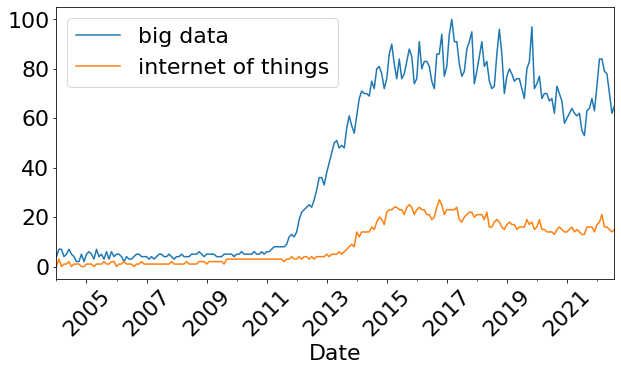

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
data['data frame'].plot(ax=ax, rot=45)

### Dogs, Cats and Rabbits

Another data set we might consider downloading from google trends is
different pets. Below we consider cats, dogs and rabbits.

In [16]:
data = pods.datasets.google_trends(['cat', 'dog', 'rabbit'], refresh_data=True)
data['data frame'].set_index('Date', inplace=True)

Accessing Google trends to acquire the data. Note that repeated accesses will result in a block due to a google terms of service violation. Failure at this point may be due to such blocks.
Query terms:  cat, dog, rabbit
Fetching query:
Done.


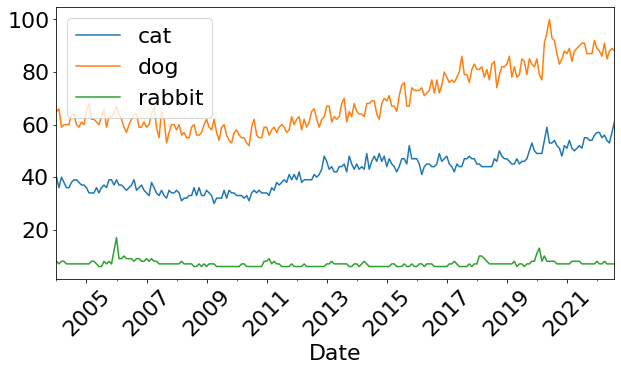

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
data['data frame'].plot(ax=ax, rot=45)

Here we’ve plotted the data in the same manner as
[sahuguet](https://github.com/sahuguet) suggested in his original
notebook, using the plotting facility of `pandas`.

### Games Consoles

Finally we can try and compare different games console popularity.

In [18]:
data = pods.datasets.google_trends(['artificial intelligence', 'big data', 'data mining', 'deep learning', 'machine learning'], refresh_data=True)

Accessing Google trends to acquire the data. Note that repeated accesses will result in a block due to a google terms of service violation. Failure at this point may be due to such blocks.
Query terms:  artificial intelligence, big data, data mining, deep learning, machine learning
Fetching query:
Done.


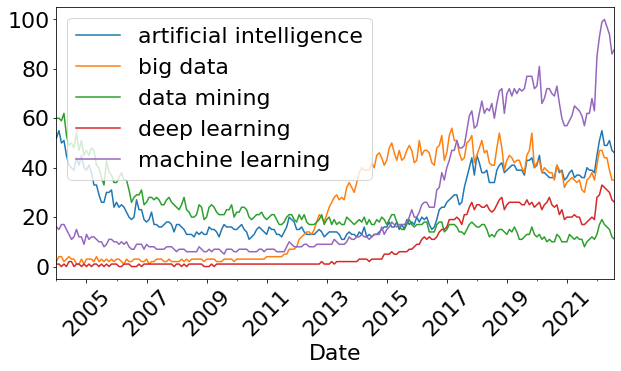

In [19]:
data['data frame'].set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(10,5))
data['data frame'].plot(ax=ax, rot=45)

## References